In [15]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
file= "data_data.csv"
datafile= pd.read_csv(file,encoding="utf8")

datafile.columns

Index(['Number of employees', 'Is your employer a tech company?',
       'Does your medical coverage include treatment of mental health?',
       'Do you currently have a mental health disorder?',
       'Do you know the options for mental health care available under your employer-provided health coverage?',
       'Have you ever been diagnosed with a mental health disorder?',
       'Have you had a mental health disorder in the past?',
       'Do you have a family history of mental illness?', 'What is your age?',
       'What is your gender?', 'What country do you work in?',
       'What is your race?',
       'Is your primary role within your company related to tech/IT?',
       'Do you believe your productivity is ever affected by a mental health issue?',
       'How well do you think the tech industry supports employees with mental health issues?',
       'Anxiety Disorder (Generalized, Social, Phobia, etc)',
       'Mood Disorder (Depression, Bipolar Disorder, etc)',
       'Psych

In [16]:
datafile.count()

Number of employees                                                                                       1173
Is your employer a tech company?                                                                          1173
Does your medical coverage include treatment of mental health?                                            1173
Do you currently have a mental health disorder?                                                           1173
Do you know the options for mental health care available under your employer-provided health coverage?    1173
Have you ever been diagnosed with a mental health disorder?                                               1173
Have you had a mental health disorder in the past?                                                        1173
Do you have a family history of mental illness?                                                           1173
What is your age?                                                                                         1173
W

In [17]:
#mental wellness by sample
sdatafile=pd.DataFrame(datafile["Do you currently have a mental health disorder?"].value_counts())
sdatafile

,Do you currently have a mental health disorder?
Yes,515
No,334
Possibly,226
Don't Know,98


In [18]:
# mental wellness by gender
gdatafile=datafile.groupby(["What is your gender?"])
gender=pd.DataFrame(gdatafile["Do you currently have a mental health disorder?"].value_counts())
gender=gender.rename(columns={"Do you currently have a mental health disorder?":"Disorder Count"})
gender.reset_index(inplace=True)
gender.head(10)

,What is your gender?,Do you currently have a mental health disorder?,Disorder Count
0,Female,Yes,200
1,Female,No,77
2,Female,Possibly,60
3,Female,Don't Know,18
4,Male,Yes,289
5,Male,No,250
6,Male,Possibly,157
7,Male,Don't Know,78
8,Other,Yes,26
9,Other,Possibly,9


In [19]:
# mental wellness by race
rdatafile=datafile.groupby("What is your race?")
race=pd.DataFrame(rdatafile["Do you currently have a mental health disorder?"].value_counts())
race=race.rename(columns={"Do you currently have a mental health disorder?":"Disorder Count"})
race.reset_index(inplace=True)
race.head()

,What is your race?,Do you currently have a mental health disorder?,Disorder Count
0,American Indian or Alaska Native,No,1
1,Asian,No,10
2,Asian,Yes,9
3,Asian,Possibly,3
4,Black or African American,Yes,7


In [20]:
# mental wellness by age
adatafile=datafile.groupby("What is your age?")
age=pd.DataFrame(adatafile["Do you currently have a mental health disorder?"].value_counts())
age=age.rename(columns={"Do you currently have a mental health disorder?":"Disorder Count"})
age.reset_index(inplace=True)
age["What is your age?"]=age["What is your age?"].replace(to_replace="No Answer",value=-1)
bin=[0,20,30,40,50,60,70,80]
age["Agegroup"]=pd.cut(age["What is your age?"].astype(float),bin)
age=age.groupby(["Agegroup","Do you currently have a mental health disorder?"])
age=pd.DataFrame(age["Disorder Count"].sum())
age.reset_index(inplace=True)
age.head()

,Agegroup,Do you currently have a mental health disorder?,Disorder Count
0,"(0, 20]",No,1
1,"(0, 20]",Possibly,5
2,"(0, 20]",Yes,3
3,"(20, 30]",Don't Know,31
4,"(20, 30]",No,92


In [21]:
# Most prevalent disorders
headers=list(datafile.columns)
firstdisorderindex=headers.index("Anxiety Disorder (Generalized, Social, Phobia, etc)")
Disorders=headers[firstdisorderindex:]
Disorderfile=pd.DataFrame({"Disordercounts":["No","Yes"]})
Disorderfile.set_index("Disordercounts")
for disorder in Disorders:
    counts=list(datafile[disorder].value_counts())
    Disorderfile[disorder]=counts
Disorderfile

,Disordercounts,"Anxiety Disorder (Generalized, Social, Phobia, etc)","Mood Disorder (Depression, Bipolar Disorder, etc)","Psychotic Disorder (Schizophrenia, Schizoaffective, etc)","Eating Disorder (Anorexia, Bulimia, etc)",Attention Deficit Hyperactivity Disorder,"Personality Disorder (Borderline, Antisocial, Paranoid, etc)",Obsessive-Compulsive Disorder,Post traumatic Stress Disorder,Stress Response Syndromes,Dissociative Disorder,Substance Use Disorder,Addictive Disorder,Other
0,No,1018,660,1160,1136,1003,1128,1105,1068,1134,1159,1136,1142,1149
1,Yes,155,513,13,37,170,45,68,105,39,14,37,31,24


In [22]:
# disorder cause examination - Number of employees
nemp=datafile.groupby("Do you currently have a mental health disorder?")
nemp=nemp["Number of employees"].value_counts()
nemp

Do you currently have a mental health disorder?  Number of employees
Don't Know                                       More than 1000          23
                                                 100-500                 22
                                                 26-100                  20
                                                 No Answer               18
                                                 25-Jun                  10
                                                 500-1000                 5
No                                               26-100                  76
                                                 100-500                 74
                                                 More than 1000          55
                                                 25-Jun                  53
                                                 No Answer               50
                                                 500-1000                16
                   

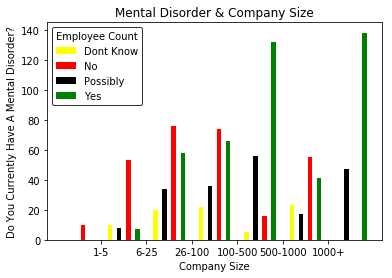

In [79]:
company_size = ['1-5','6-25','26-100', '100-500', '500-1000', '1000+']
employee_count = ['Dont Know', 'No', 'Possibly', 'Yes']
Dont_Know = [0, 10, 20, 22, 5, 23]
No = [10, 53, 76, 74, 16, 55]
Possibly = [8, 34, 36, 56, 17, 47]
Yes = [7, 58, 66, 132, 41, 138]

Z = np.arange(len(company_size))

plt.bar(Z -0.8, Dont_Know, 0.1, color = 'yellow')
plt.bar(Z -0.4, No, 0.1, color = 'red')
plt.bar(Z +0.4, Possibly, 0.1, color = 'black')
plt.bar(Z +0.8, Yes, 0.1, color = 'green')

plt.title('Mental Disorder & Company Size', fontsize = 12)
plt.xlabel('Company Size')
plt.ylabel('Do You Currently Have A Mental Disorder?')

plt.legend(employee_count, title = 'Employee Count', frameon = True, edgecolor = 'black')

plt.xticks(Z, company_size)

plt.show()

In [55]:
# disorder cause examination - Does your medical coverage include treatment of mental health?
cov=datafile.groupby("Do you currently have a mental health disorder?")
cov=cov["Does your medical coverage include treatment of mental health?"].value_counts()
cov

Do you currently have a mental health disorder?  Does your medical coverage include treatment of mental health?
Don't Know                                       No                                                                 88
                                                 yes                                                                10
No                                               No                                                                299
                                                 yes                                                                35
Possibly                                         No                                                                204
                                                 yes                                                                22
Yes                                              No                                                                462
                                                 yes   

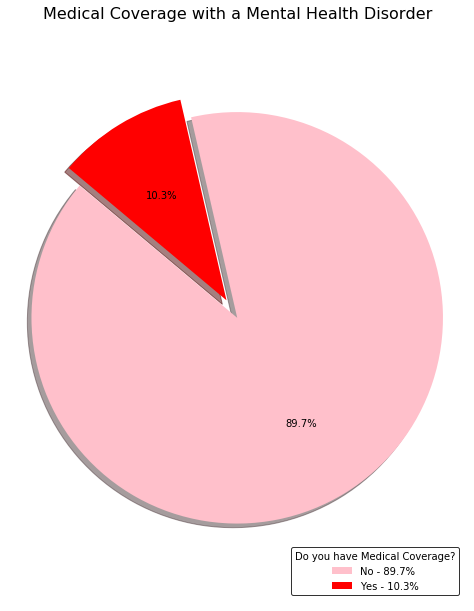

In [30]:
disorder = ['Dont Know','No', 'Possibly', 'Yes']
medical_coverage = ['No', 'Yes']
no_coverage = [88, 299, 204, 462]
yes_coverage = [10, 35, 22, 53]
Z = np.arange(len(disorder))
no_bar_width = -0.0
yes_bar_width = +0.0

coveragewdisorder = [462,53]
explode=(0,0.1)
labels= ['No', 'Yes']
colors1 = ['pink','red']

fig1, ax = plt.subplots(figsize=(9, 8))
fig1.subplots_adjust(0.3,0,1,1)

plt.pie(coveragewdisorder, explode=explode, colors=colors1,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.title('Medical Coverage with a Mental Health Disorder', fontsize = 16)
plt.legend(["No - 89.7%","Yes - 10.3%"], title = 'Do you have Medical Coverage?', frameon = True, edgecolor = 'black', loc='lower right')


plt.savefig("medical_coverage_with_a_mental_health_disorder.png")


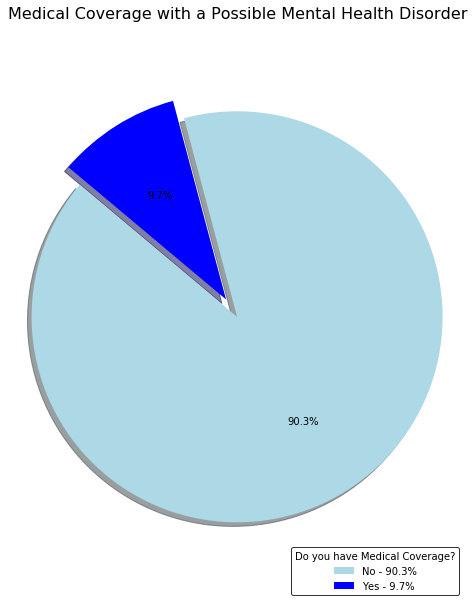

In [26]:
coveragepossdisorder = [204,22]
colors2 = ['lightblue','blue']

fig2, ax = plt.subplots(figsize=(9, 8))
fig2.subplots_adjust(0.3,0,1,1)

plt.pie(coveragepossdisorder, explode=explode, colors=colors2,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.title('Medical Coverage with a Possible Mental Health Disorder', fontsize = 16)
plt.legend(["No - 90.3%", "Yes - 9.7%"], title = 'Do you have Medical Coverage?', frameon = True, edgecolor = 'black', loc='lower right')


plt.savefig("medical_coverage_possibly_with_a_mental_health_disorder.png")



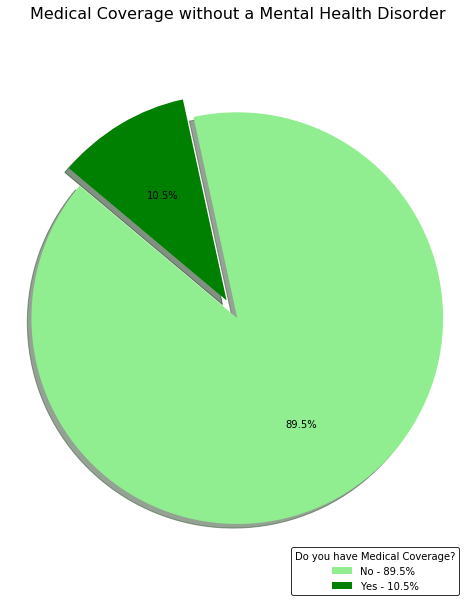

In [8]:
coveragenodisorder = [299,35]
colors3 = ['lightgreen','g']

fig2, ax = plt.subplots(figsize=(9, 8))
fig2.subplots_adjust(0.3,0,1,1)

plt.pie(coveragenodisorder, explode=explode, colors=colors3,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.title('Medical Coverage without a Mental Health Disorder', fontsize = 16)
plt.legend(["No - 89.5%", "Yes - 10.5%"], title = 'Do you have Medical Coverage?', frameon = True, edgecolor = 'black', loc='lower right')


#plt.savefig("medical_coverage_possibly_with_a_mental_health_disorder.png")
plt.show()


In [27]:
# disorder cause examination - Do you know the options for mental health care available under your employer-provided health coverage?
opt=datafile.groupby("Do you currently have a mental health disorder?")
opt=opt["Do you know the options for mental health care available under your employer-provided health coverage?"].value_counts()
opt


Do you currently have a mental health disorder?  Do you know the options for mental health care available under your employer-provided health coverage?
Don't Know                                       No                                                                                                         78
                                                 Yes                                                                                                        20
No                                               No                                                                                                        240
                                                 Yes                                                                                                        94
Possibly                                         No                                                                                                        161
                                                 Yes 

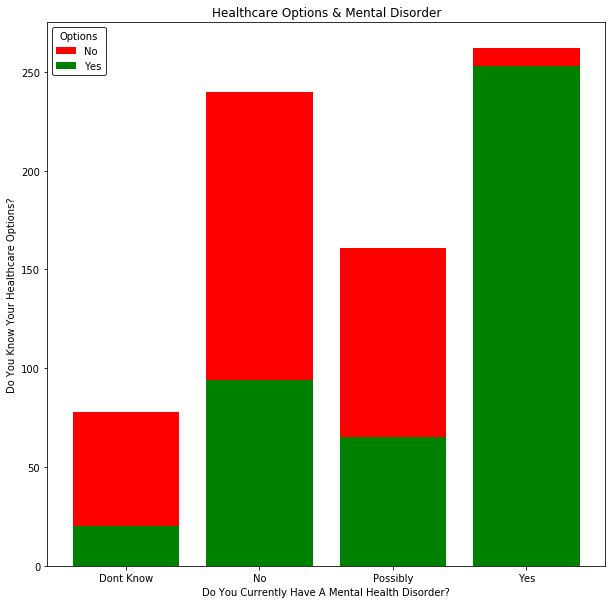

In [28]:
disorder = ['Dont Know','No', 'Possibly', 'Yes']
options = ['No', 'Yes']
no_options = [78, 240, 161, 262]
yes_options = [20, 94, 65, 253]
Z = np.arange(len(disorder))
no_bar_width = -0.0
yes_bar_width = +0.0

fig2, ax = plt.subplots(figsize=(10, 10))

plt.bar(Z+no_bar_width, no_options, color = 'red') 
plt.bar(Z+yes_bar_width, yes_options, color = 'green')

plt.title('Healthcare Options & Mental Disorder', fontsize = 12)
plt.xlabel('Do You Currently Have A Mental Health Disorder?')
plt.ylabel('Do You Know Your Healthcare Options?')

plt.xticks(Z, disorder)

plt.legend(options, title = 'Options', frameon = True, edgecolor = 'black')

plt.show()

In [16]:
# disorder cause examination - Have you ever been diagnosed with a mental health disorder?
his=datafile.groupby("Do you currently have a mental health disorder?")
his=his["Have you ever been diagnosed with a mental health disorder?"].value_counts()
his

Do you currently have a mental health disorder?  Have you ever been diagnosed with a mental health disorder?
Don't Know                                       No                                                              98
No                                               No                                                             334
Possibly                                         No                                                             226
Yes                                              Yes                                                            503
                                                 No                                                              12
Name: Have you ever been diagnosed with a mental health disorder?, dtype: int64

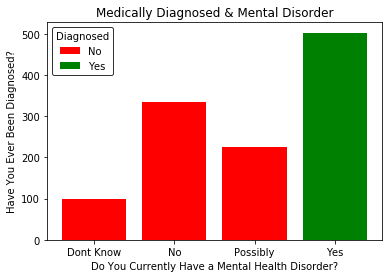

In [183]:
disorder = ['Dont Know', 'No', 'Possibly', 'Yes']
diagnosed = ['Dont Know', 'No', 'Possibly', 'Yes']
no_diagnosed = [98, 334, 226, 12]
yes_diagnosed = [0, 0, 0, 503]
Z = np.arange(len(disorder))
no_bar_width = -0.0
yes_bar_width = +0.0

plt.bar(Z+no_bar_width, no_diagnosed, color = 'red') 
plt.bar(Z+yes_bar_width, yes_diagnosed, color = 'green')

plt.title('Medically Diagnosed & Mental Disorder', fontsize = 12)
plt.xlabel('Do You Currently Have a Mental Health Disorder?')
plt.ylabel('Have You Ever Been Diagnosed?')

plt.xticks(Z, diagnosed)

plt.legend(options, title = 'Diagnosed', frameon = True, edgecolor = 'black')

plt.show()

In [17]:
# disorder cause examination - Have you had a mental health disorder in the past?
past=datafile.groupby("Do you currently have a mental health disorder?")
past=past["Have you had a mental health disorder in the past?"].value_counts()
past

Do you currently have a mental health disorder?  Have you had a mental health disorder in the past?
Don't Know                                       No                                                     44
                                                 Don't Know                                             36
                                                 Possibly                                               13
                                                 Yes                                                     5
No                                               No                                                    236
                                                 Yes                                                    50
                                                 Possibly                                               41
                                                 Don't Know                                              7
Possibly                                    

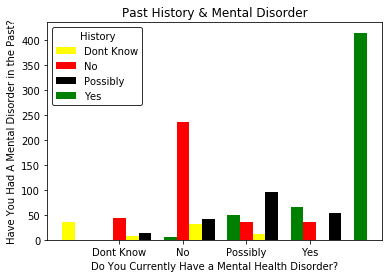

In [185]:
disorder = ['Dont Know','No', 'Possibly', 'Yes']
past = ['Dont Know', 'No', 'Possibly', 'Yes']
dontknow_past = [36, 7, 31, 11]
no_past = [44, 236, 35, 35]
possibly_past = [13, 41, 95, 54 ]
yes_past = [5, 50, 65, 415]

Z = np.arange(len(disorder))

dontknow_bar_width = -0.8
no_barwidth = -0.4
possibly_bar_width = +0.4
yes_bar_width = +0.8

plt.bar(Z+dontknow_bar_width, dontknow_past, 0.2, color = 'yellow')
plt.bar(Z+no_bar_width, no_past, 0.2, color = 'red') 
plt.bar(Z+possibly_bar_width, possibly_past, 0.2, color = 'black')
plt.bar(Z+yes_bar_width, yes_past, 0.2, color = 'green')

plt.title('Past History & Mental Disorder', fontsize = 12)
plt.xlabel('Do You Currently Have a Mental Health Disorder?')
plt.ylabel('Have You Had A Mental Disorder in the Past?')

plt.xticks(Z, past)

plt.legend(past, title = 'History', frameon = True, edgecolor = 'black')

plt.show()

In [159]:
# disorder cause examination - Do you have a family history of mental illness?
fam=datafile.groupby("Do you currently have a mental health disorder?")
fam=fam["Do you have a family history of mental illness?"].value_counts()
fam

Do you currently have a mental health disorder?  Do you have a family history of mental illness?
Don't Know                                       No                                                  39
                                                 I don't know                                        31
                                                 Yes                                                 28
No                                               No                                                 190
                                                 Yes                                                 96
                                                 I don't know                                        48
Possibly                                         I don't know                                        88
                                                 Yes                                                 86
                                                 No                    

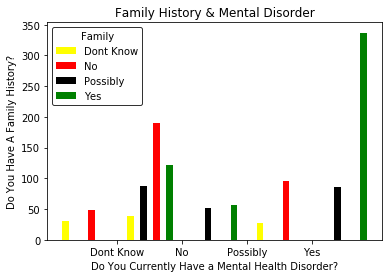

In [184]:
disorder = ['Dont Know','No', 'Possibly', 'Yes']
family = ['Dont Know', 'No', 'Possibly', 'Yes']
dontknow_family = [31, 39, 0, 28]
no_family = [48, 190, 0, 96]
possibly_family = [88, 52, 0, 86]
yes_family = [121, 57, 0, 337]

Z = np.arange(len(disorder))

plt.bar(Z -0.8, dontknow_family, 0.1, color = 'yellow')
plt.bar(Z -0.4, no_family, 0.1, color = 'red')
plt.bar(Z +0.4, possibly_family, 0.1, color = 'black')
plt.bar(Z +0.8, yes_family, 0.1, color = 'green')

plt.title('Family History & Mental Disorder', fontsize = 12)
plt.xlabel('Do You Currently Have a Mental Health Disorder?')
plt.ylabel('Do You Have A Family History?')

plt.xticks(Z, family)

plt.legend(past, title = 'Family', frameon = True, edgecolor = 'black')

plt.show()

Text(0,0.5,'Number of Survery Participants')

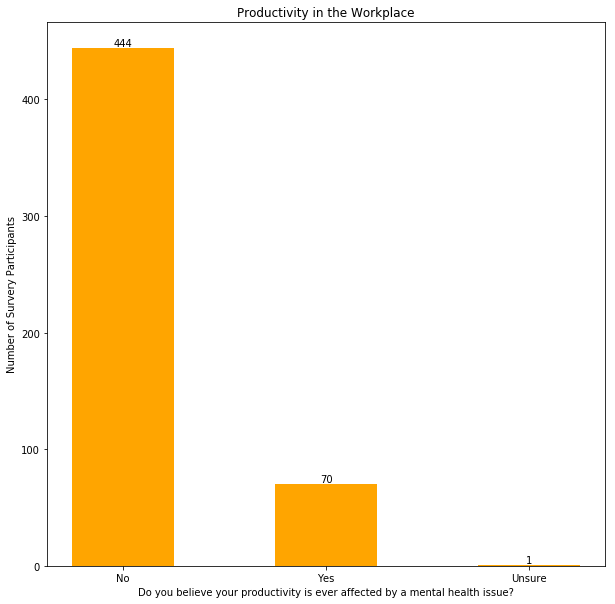

In [71]:
productivitydata = datafile[['Do you currently have a mental health disorder?','Do you believe your productivity is ever affected by a mental health issue?']]
prod_disorder = productivitydata.loc[productivitydata['Do you currently have a mental health disorder?'] == 'Yes',:]


df = pd.DataFrame(prod_disorder['Do you believe your productivity is ever affected by a mental health issue?'].value_counts())

fig2, ax = plt.subplots(figsize=(10, 10))

xaxis = df.index
data = df['Do you believe your productivity is ever affected by a mental health issue?']

ax = plt.bar(xaxis, data, 0.5, color = 'orange')

# Add counts above the two bar graphs
for rect in ax:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    
plt.title('Productivity in the Worklace', fontsize = 12)
plt.xlabel('Do you believe your productivity is ever affected by a mental health issue?')
plt.ylabel('Number of Survery Participants')
